# BERTopic modeling - With all the review text

Using the documentation provided in here: https://maartengr.github.io/BERTopic/index.html

## Load the required libraries

In [1]:
from transformers import pipeline
import pandas as pd
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default = "svg"

/Users/apgopala/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load the required Data set and do basic cleaning of the reviews field

In [2]:
df = pd.read_csv('ca_restaurants.csv')

In [3]:
# Load sample of data 
sample_df = df.head(10000)

In [4]:
# Print the review text data
sample_df['text'].values[0:1]

array(["Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our  cook  said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back."],
      dtype=object)

In [5]:
# Convert the review text to string and then convert it to lower
sample_df['text'] = sample_df['text'].astype('str')

sample_df['text'] = sample_df['text'].apply(lambda x : x.lower())

In [6]:
# List of stopwords
stopwords = list(["a", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])

In [7]:
def removeStopwords(x):
    '''
    To remove stopwords from the review text
    '''
    for s in stopwords:
        enriched = " " + s + " "
        if enriched in x:
            x = x.replace(enriched, " ")
    return x

In [8]:
# Apply lambda function to remove stopwords from the review text
sample_df['text'] = sample_df['text'].apply(lambda x: removeStopwords(x))

In [9]:
# Get the cleaned reviews data when it is not null and load it into 'docs'
docs = sample_df[sample_df['text']!='']['text'].values

## BERTopic modeling

In [10]:
# We are using the KeyBERTInspired model which speeds up inference
representation_model = KeyBERTInspired()

# Use the keybert model and setting the number of topics to 29 and the minimum topic size to 100 
# to get decent sized clusters

topic_model = BERTopic(representation_model=representation_model, \
                       language="english", calculate_probabilities=True,\
                       verbose=True, nr_topics=29, min_topic_size=100)

In [11]:
# Once the model is initialized, call the fit transform on the reviews data
topics, probs = topic_model.fit_transform(docs)

2024-04-18 09:14:28,831 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2024-04-18 09:15:42,042 - BERTopic - Embedding - Completed ✓
2024-04-18 09:15:42,043 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-18 09:16:04,288 - BERTopic - Dimensionality - Completed ✓
2024-04-18 09:16:04,290 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-18 09:16:05,313 - BERTopic - Cluster - Completed ✓
2024-04-18 09:16:05,314 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-18 09:16:10,601 - BERTopic - Representation - Completed ✓
2024-04-18 09:16:10,608 - BERTopic - Topic reduction - Reducing number of topics
2024-04-18 09:16:10,620 - BERTopic - Topic reduction - Reduced number of topics from 18 to 18


In [12]:
# Get the topic information
freq = topic_model.get_topic_info();

In [13]:
# Print the topic details
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1254,-1_restaurant_meal_lunch_cafe,"[restaurant, meal, lunch, cafe, dinner, burger...","[this place world! appearance, location, food ..."
1,0,152,0_hotdogs_hotdog_daves_pizza,"[hotdogs, hotdog, daves, pizza, dave, dogs, pe...","[to honest, hot dogs. location milpas friend p..."
2,1,364,1_thai_rice_restaurants_curries,"[thai, rice, restaurants, curries, restaurant,...",[best thai food santa barbara county! grew san...
3,2,257,2_bus_buses_transportation_wedding,"[bus, buses, transportation, wedding, tour, si...",[we jump school bus wedding transportation. gu...
4,3,652,3_bowls_bowl_smoothies_smoothie,"[bowls, bowl, smoothies, smoothie, acai, foods...",[went time delicious. ingredients appeared fre...
5,4,2293,4_seafood_crab_shrimp_lobster,"[seafood, crab, shrimp, lobster, crabs, oyster...",[fresh seafood pier enjoy ocean. clam chowder ...
6,5,180,5_hotel_rooms_motel_casa,"[hotel, rooms, motel, casa, restaurants, inn, ...",[such cute inn! honey reserved room sunday nig...
7,6,631,6_sushi_sashimi_restaurants_restaurant,"[sushi, sashimi, restaurants, restaurant, tuna...",[i love 1/2 price sushi everyday now. cheaper ...
8,7,255,7_pizza_pizzas_restaurant_pepperoni,"[pizza, pizzas, restaurant, pepperoni, pizzama...","[i pizza connoisseur but, wow. thought pizza s..."
9,8,448,8_winery_wines_wineries_wine,"[winery, wines, wineries, wine, pier, tastings...",[having wine views better?! wine tasting room ...


In [14]:
# Save the results 
freq.to_csv('berttopic_results_overall.csv')

In [15]:
# Looking at the words from the most frequent topic
topic_model.get_topic(0) 

[('hotdogs', 0.5523782),
 ('hotdog', 0.5422332),
 ('daves', 0.40247148),
 ('pizza', 0.37910637),
 ('dave', 0.36763075),
 ('dogs', 0.36253083),
 ('pepperoni', 0.35353628),
 ('bbq', 0.34896088),
 ('dog', 0.34887055),
 ('delicious', 0.33457994)]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


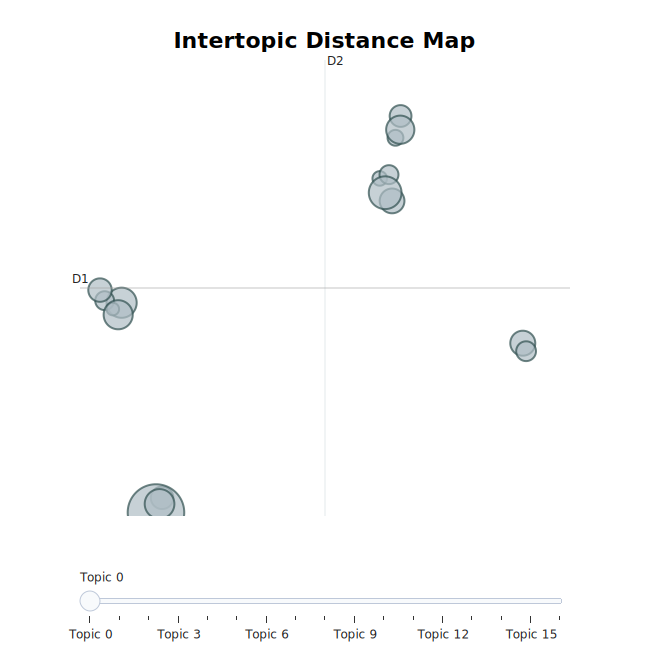

In [16]:
# Visualize the intertopic distance
topic_model.visualize_topics()

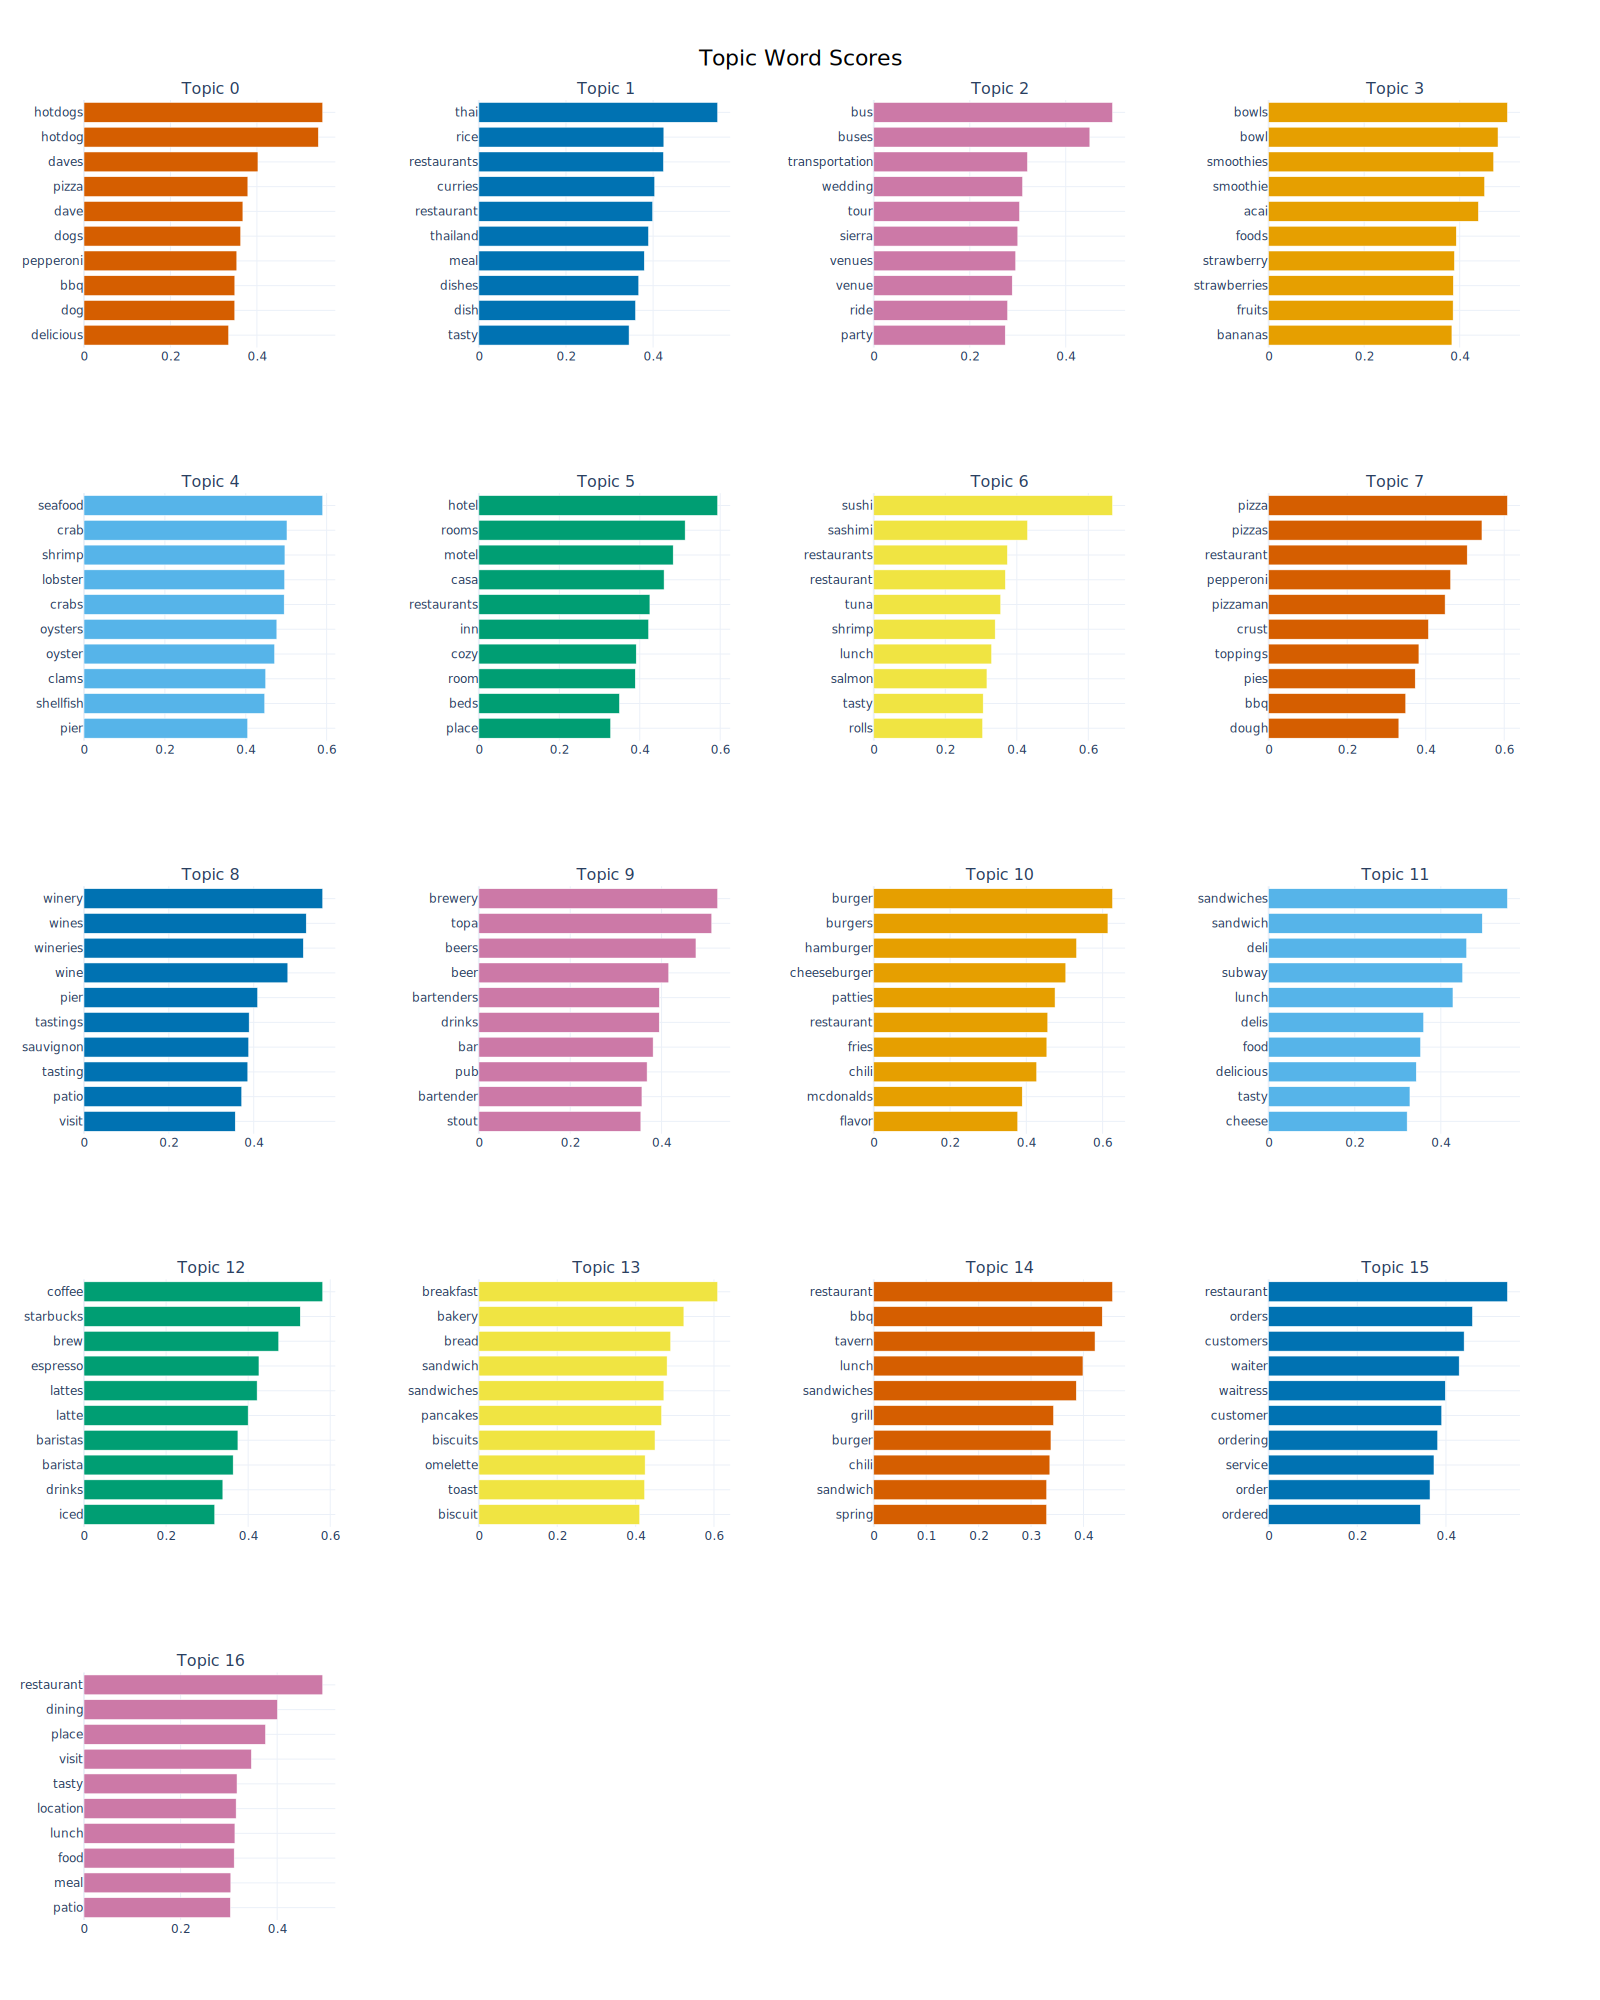

In [17]:
# Visualize the topics and words in each
topic_model.visualize_barchart(n_words=10, width=400, height=400, top_n_topics=29)

In [18]:
# Save the topic model results
fig = topic_model.visualize_barchart(n_words=5, width=400, height=200, top_n_topics=29)
fig.write_html("bertopic_overall.html")

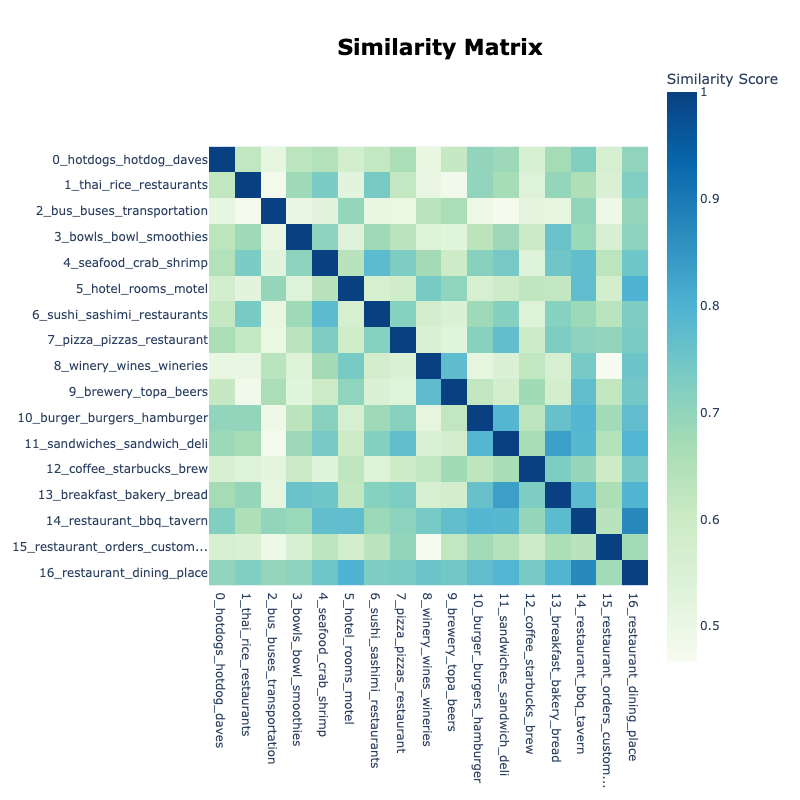

In [19]:
# The similarity matrix tells us how similar certain topics are to each other and it is calcualted using cosine similarity
fig = topic_model.visualize_heatmap()
fig.show("png")

In [20]:
#Done